<a href="https://colab.research.google.com/github/nicolas-stelatto/bootcamp_data_science_aplicada/blob/main/Bootcamp_Data_Science_Aplicada_Modulo_01_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caderno de exploração dos dados do datasus 2008 até mai/2021

## 02.Primeiras visualizações de gráficos

### 01 Entendendo gráficos

AS informações de onde conseguimos a base de dados para o trabalho estão no arquivo txt dentro do GitHub e do Notion [nesse link](https://www.notion.so/02-Primeiras-visualiza-es-de-dados-01-Entendendo-gr-ficos-612fd521bb814ec3a32be6ac102152dc)


In [ ]:
import pandas as pd

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv")

Se tentarmos abrir o arquivo assim, aparecerá um erro utf-8, que é muito comum quando vamos abrir arquivos do governo. Esse erro está associado à forma de abrir um arquivo.

Uma analogia é que o á é lido em português de uma forma, mas em outras línguas é lido de outra forma. Para isso, nós precisamos definir uma regra para o Python ler o arquivo. Para isso, precisamos definir um parâmetro dentro da nossa função que é encoding = "ISO-8859-1"

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1")

Agora se formos rodar esse arquivo, ele resultará o erro "Error Tokenising Data". Nesse caso, precisamos informar que é necessário pular as três primeiras linhas (porque não são relevantes) e também informar que o separador é o ";" e não p ","

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/Valor total por Ano_mês atendimento segundo Unidade da Federação.csv", encoding="ISO-8859-1", skiprows=3, sep=";", engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8457455,71","7766983,20","8858845,57","8407076,44","9492938,92","8206195,92","9011612,58","9124967,84","8406732,72","8411360,02","8651081,66","8193425,99","8388269,45","8645315,78","9050329,13","9211262,51","9490545,02","8600886,20","8919190,86","8909111,89","8409386,09","8924348,41","8948605,66","8660753,05","8327665,97","8431334,62","7251287,20","7490440,60","8957706,45","10993332,84","10479989,36","11433467,56","8876900,39","8167253,19","8759013,71","9003402,23","8414690,60","6039419,59","4732441,04","996411254,68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2968168,75","2769797,39","3057631,96","2874965,31","3175575,17","3060903,21","3253011,61","3040645,05","2926179,27","3126120,64","2473454,85","2277493,49","2594347,32","2234388,36","2473008,49","2979764,77","3070533,95","3249052,69","3567538,64","2981072,98","2998860,31","3293378,97","3174249,43","2959569,09","3276790,55","2985763,71","2939675,20","2672857,33","2940827,86","3914823,86","4053085,41","3658265,59","3470409,45","3267918,69","3393958,27","3711660,71","3005561,16","2272733,90","1137341,65","450048530,47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14549450,86","12753555,36","14749409,47","14577930,81","15381061,96","14653650,77","15544595,79","16374961,41","15343340,93","16249963,61","14255408,82","14274053,94","15358914,00","14100074,56","16103971,89","16154491,82","16529976,06","15509984,83","16642220,71","16493719,52","15351607,47","16339427,95","14821977,50","14965815,90","15982353,42","15166470,82","14815958,58","16379386,07","19625325,21","18433057,47","19303743,16","18687233,58","18628627,49","18728251,20","20451573,77","21546059,48","24439059,57","13679358,06","6799060,80","1917247936,05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2740952,07","2478349,44","2674958,94","2721261,19","2844811,66","2967161,35","2841587,97","3328230,63","2878691,04","2964324,32","2524712,40","2462451,64","2662240,18","2499996,16","2846135,56","2789823,29","2839389,53","2647540,20","2865777,71","3181321,82","3070436,96","3162342,44","3121104,71","2889969,87","3084561,08","2967159,04","2813954,05","2306119,95","2921522,16","3300012,98","3192075,41","3262354,34","2978629,22","3313296,78","3527263,23","3125021,90","3209323,68","3044798,77","2381844,31","328876965,09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33615836,09","30623491,62","34121931,00","35039954,20","35424611,06","34160283,18","34484949,49","35618364,04","34380916,90","38441090,50","33583538,08","32789354,87","34513534,80","31885919,67","33236155,79","31008924,95","31064106,50","28543179,30","36713929,36","36462011,47","36792954,02","36984314,60","35579251,49","35247659,30","37046350,76","34683341,17","34908420,50","29184688,30","43327731,71","40994545,21","40496349,97","38793393,54","36965951,76","38406616,21","37043032,10","36914437,92","33887773,65","23343222,94","13069564,31","4705309002,29"


No arquivo, ainda tem algumas linhas no final que não são relevantes para a nossa análise. O que precisamos fazer é excluir as doze últimas linhas

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, engine="python")
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9222010,60","7493901,30","8148169,46","7353768,37","7739864,47","9246097,96","11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15788848,91","15784686,14","14388606,82","16063450,73","14939977,20","15107056,74","13534657,88","19698748,89","21129394,43","19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,0

In [ ]:
dados.mean()

Series([], dtype: float64)

Vendo essa mensagem de erro, nós vemos que na verdade os valores são textos (Strings), e não números, porque, na língua portuguesa, nós identificamos separador de decimais com "," e o python por padrão utiliza ".". Dessa forma, o python entende que o valor é uma String, e não um número.

Para ajustar esse problema, precisamos informar no read csv outras informações - adicionar outros parâmetros

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32

In [ ]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Dez    5.337776e+07
2021/Jan    5.607375e+07
2021/Fev    5.557823e+07
2021/Mar    6.250230e+07
Total       6.388213e+09
Length: 159, dtype: float64

Não conseguimos analisar bem essas informações porque os dados estão em notação científica (forma de impressão está como notação científica). Para resolver o problema, basta alterar de forma global essa forma de impressão

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

Como podemos fazer para selecionar os valores da coluna 2008/jan?

Retomando o questionamento do vídeo anterior: Como podemos fazer para selecionar os valores da coluna 2008/jan?

In [ ]:
dados["2008/Jan"]

0     1388528.39
1      902416.00
2     4735529.42
3      657889.53
4    18864744.11
5     1120973.34
6     3441592.69
7    10723506.39
8     7985142.43
9    15539821.90
10    5947814.08
11   10723002.45
12   14393949.89
13    6243726.32
14    2780750.11
15   21211522.47
16   45671659.76
17    5456723.98
18   23025258.52
19   91678473.48
20   38266347.46
21   16504913.45
22   30931325.46
23    5377392.11
24    4795299.01
25   15310637.29
26    4745919.19
Name: 2008/Jan, dtype: float64

Esses valores que aparecem de uma coluna apenas são chamados de SÉRIES. A forma de chamar uma coluna é a mesma forma de chamar o Value de um Dictionary (chamando o Key do Dictionary)

In [ ]:
dados["2008/Ago"].mean()

27800320.306666665

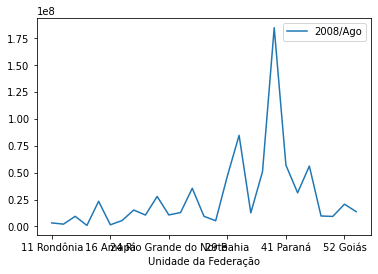

In [ ]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

Esse gráfico não está muito visível, porque as legendas não estão muito boas e, principalmente, porque, pelo tipo de dados que estamos lendo, o gráfico de linhas é ruim para visualização. É melhor plotar o gráfico de barras.

Para plotar o gráfico de barras podemos fazer da forma que está abaixo ou podemos fazer:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar")

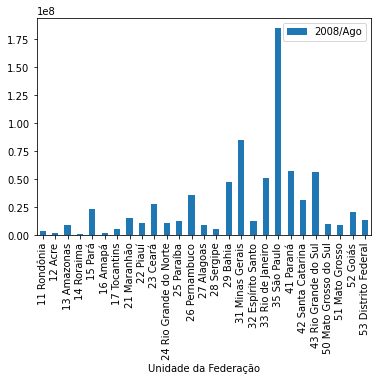

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago")

Nesse gráfico, podemos aumentar o tamanho da figura. Usamos o parâmatro Figsize para aumentar o tamanho colocando uma tupla de valores

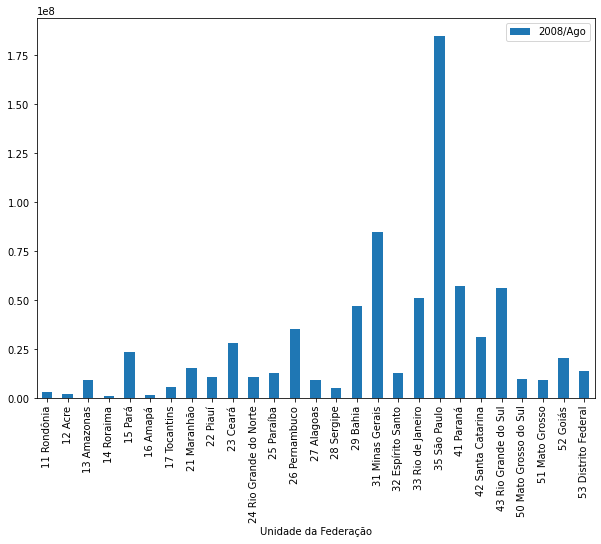

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))

Para arrumar esse problema, precisamos primeiramente usar a biblioteca matplotlib.pyplot usando a função import e importar a biblioteca matplotlib.ticker.FormatStrFormatter

#### Desafio 01: escolher um título mais descritivo, que passe a mensagem adequada.
obs: pensar no que você vai falar no gráfico. Porque se pensar "Valor por unidade da federação" não é um título que passa nenhuma mensagem, não agrega em nada. Na verdade era só ter lido os eixos que você já chegaria na conclusão do título

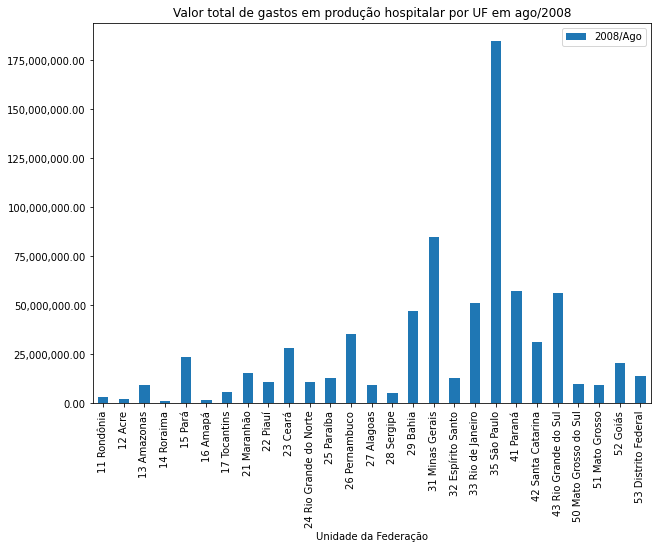

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))
#esse AX também é a mesma coisa que AXIS, que são os controles dos eixos X e eixos Y de um gráfico

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#buscar na documentação essa função e colocar o "," para separação de milhares e "." para separação de decimais com duas casas

plt.title("Valor total de gastos em produção hospitalar por UF em ago/2008")
#função para colocar o título em um gráfico

plt.show()
#método para excluir algumas informações de detalhes que apareceria antes do gráfico

No caso do título, precisaríamos informar quais são os valores que estão sendo exibiso (valor total de gastos em produção hospitalar) separado por UF da série histórica de agosto de 2008

#### Desafio 02: Faça a mesma análise para o mês mais recente

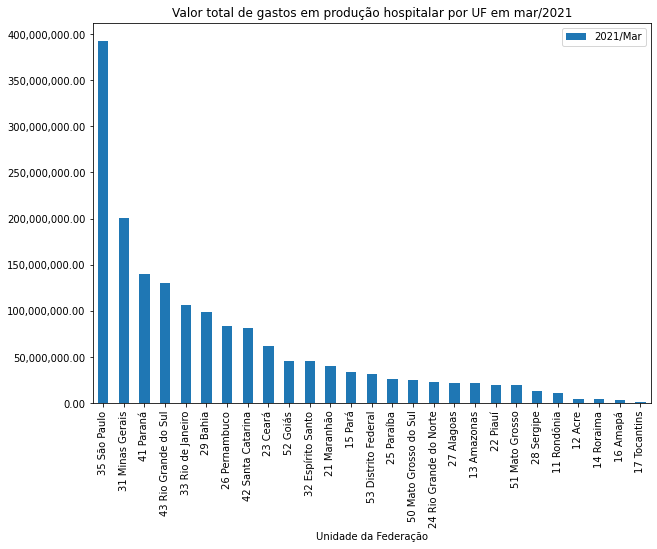

In [ ]:
ax = dados.sort_values(by="2021/Mar", ascending = False).plot.bar(x="Unidade da Federação", y="2021/Mar", figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor total de gastos em produção hospitalar por UF em mar/2021")
plt.show()

In [ ]:
#dados["2008/Ago", "2008/Set"]
# se você tentar rodar esse código não vai funcionar, porque funciona como um dicionário, 
# ele procura uma coluna que possui esse valor "2008/Ago", "2008/Set" e como não existe dá um KeyError
# como nós queremos duas colunas precisamos criar uma lista com dois elementos

In [ ]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,3231494.61,3117178.63
1,2089107.14,2275708.53
2,9352532.70,9363099.35
3,894271.18,910424.17
4,23341218.03,25172261.32


Agora nós queremos comparar dois meses por estado ou algo do gênero. Mas, para isso, precisamos pegar um mês que todos os estados possuem valores. A forma abaixo é uma de fazer isso.

obs: uma outra forma de tratar esses valores vazios é dropar esses valores, preencher eles com algum outro valor etc

In [ ]:
dados.mean()
# traz somente a média de um mês que tem todos os estados com um valor, por isso, não mostra valores de 1992

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

No caso das informações acima, estamos interessados apenas nos valores da esquerda (também chamados de Index) para fazermos nossa análise. Dessa forma, podemos selecionar os valores dos index da seguinte forma)

In [ ]:
#colunas_usaveis = dados.mean().index
# feito essa seleção das colunas nós ainda queremos inserir uma coluna no início dos dados que mostra as unidades da federação. Para isso podemos fazer o seguinte:

#colunas_usaveis.insert(0, "Unidade da Federação")
# se tentarmos inserir dessa forma não irá funcionar, porque o resultado do .index é uma série não mutável (não é uma lista). Para funcionar, precisamos transformar em uma lista

colunas_usaveis = dados.mean().index.to_list()
colunas_usaveis.insert(0, "Unidade da Federação")

Agora vamos fazer um slice na nossa tabela só dos meses que temos todos os dados de estados com valores preenchidos

In [ ]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20

Aqui percebemos que o nosso index está como 0, 1, 2, 3 ... mas na verdade isso não é útil nem prático, porque o nosso index é a Unidade da Federação. Para isso, podemos setar como index esses valores

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.

In [ ]:
usaveis["2009/Ago"].head()
# traz a coluna de 2009 ago

Unidade da Federação
11 Rondônia    3533625.83
12 Acre        2307579.00
13 Amazonas    9578326.03
14 Roraima     1848998.68
15 Pará       27588522.26
Name: 2009/Ago, dtype: float64

In [ ]:
usaveis.loc["12 Acre"]
# essa função Loc localiza a linha cujo indice é 12 Acre

2008/Jan      902416.00
2008/Fev     1497206.26
2008/Mar     1794028.48
2008/Abr     1730469.42
2008/Mai     1819443.92
               ...     
2020/Dez     3696997.31
2021/Jan     3715723.12
2021/Fev     3538427.92
2021/Mar     4077045.92
Total      450048530.47
Name: 12 Acre, Length: 159, dtype: float64

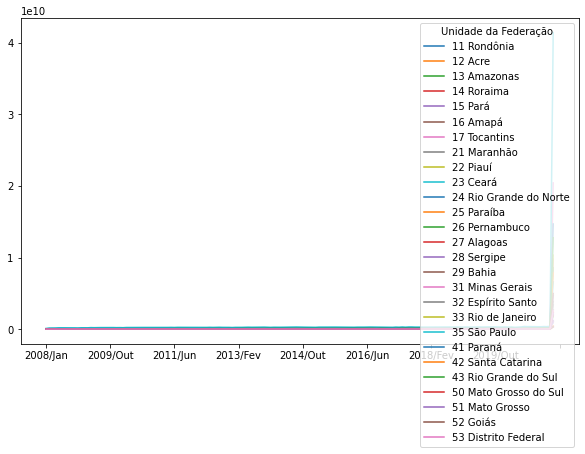

In [ ]:
#usaveis.head()
# se observamos a nossa tabela nós podemos ver que as linhas são os estados e as colunas são as datas, nós podemos transpor essa tabela usando a função .T e plotar um gráfico

usaveis.T.plot(figsize=(10, 6))

Esse gráfico está inelegível porque existe uma coluna no final do gráfico que é muito maior do que qualquer outra coluna. Usando a função .tail no nosso df podemos descobrir qual é esse valor

In [ ]:
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,8880836.55,3696997.31,17765167.69,3454460.94,38015145.79,2566919.60,675277.05,30783403.58,20883972.79,50849353.22,23846816.35,18099514.43,70978052.15,17805273.37,11454427.82,85871122.17,172509435.62,33674687.78,90416725.95,330489045.98,120037066.76,70333079.37,111760506.80,19629591.55,19583803.46,44147353.21,22991567.76
2021/Jan,9266014.59,3715723.12,21430289.17,3266928.47,38354682.46,2802886.34,419553.49,30738750.31,22689390.32,52078218.88,28044464.51,19524543.63,83846222.44,17543184.88,12060864.70,79961693.17,174722161.98,39642483.39,94179674.42,355149525.60,122122779.12,71970474.56,119992419.94,21693311.15,19120141.68,46127763.88,23527050.29
2021/Fev,7730597.04,3538427.92,25917134.55,3519773.73,37688314.23,2817849.31,319160.87,30924484.99,19400269.01,53171253.41,26317613.74,21302722.77,75562664.69,18526929.38,13003816.54,81992571.15,177270694.34,40243896.20,85583557.95,348827130.99,132622112.72,74337524.03,111797400.70,24337295.63,18349376.92,42742773.93,22766952.62
2021/Mar,11023309.47,4077045.92,22032176.22,3985530.08,33276392.89,3188210.98,1357751.33,39663677.48,20018325.75,62079618.54,23306498.68,25750897.89,83870992.73,22118639.05,13321494.41,98746333.07,200471045.07,45490499.45,106837295.81,392946147.42,140264608.52,81376630.57,130155185.16,25168195.34,19611032.61,45592686.49,31831917.45
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,2660122027.15,2614919044.63,8581189975.91,2236415402.51,1215853015.00,9791541570.52,20418737536.66,3405850698.58,10337391164.52,41396604304.13,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973573613.47,2592422853.56


Esse valor que está lá é o valor do total. Para podermos criar um gráfico mais adequado precisamos remover esse total

In [ ]:
usaveis = usaveis.drop("Total", axis=1)
# axis 0 é o eixo da Coluna e axis 1 é o eixo da linha, como Total está na linha colocamos 1

usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,

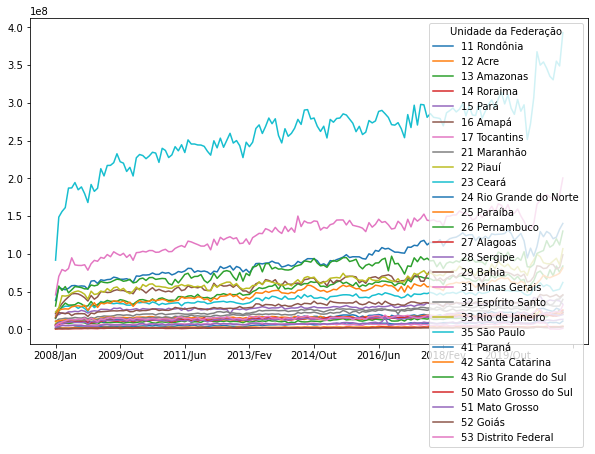

In [ ]:
usaveis.T.plot(figsize=(10, 6))

### Desafio 01: Reposicionar a legenda. Dentro? Fora? Onde?

Nesse gráfico, além do tamanho ruim e que a legenda está no meio dos valores, eu acho difícil de descobrir o segundo maior valor (é do Tocantins?, é do Distrito Federal?)

Para melhorar a visualização do gráfico, além de ajustar o tamanho da figura e melhorar o posicionamento da legenda, eu pensei em ajustar a ordem das legendas para ser do maior para menor (tomando como base os últimos valores - Mar de 2021)

In [ ]:
usaveis["2021/Mar"].sort_values(ascending=False)

Unidade da Federação
35 São Paulo             392946147.42
31 Minas Gerais          200471045.07
41 Paraná                140264608.52
43 Rio Grande do Sul     130155185.16
33 Rio de Janeiro        106837295.81
29 Bahia                  98746333.07
26 Pernambuco             83870992.73
42 Santa Catarina         81376630.57
23 Ceará                  62079618.54
52 Goiás                  45592686.49
32 Espírito Santo         45490499.45
21 Maranhão               39663677.48
15 Pará                   33276392.89
53 Distrito Federal       31831917.45
25 Paraíba                25750897.89
50 Mato Grosso do Sul     25168195.34
24 Rio Grande do Norte    23306498.68
27 Alagoas                22118639.05
13 Amazonas               22032176.22
22 Piauí                  20018325.75
51 Mato Grosso            19611032.61
28 Sergipe                13321494.41
11 Rondônia               11023309.47
12 Acre                    4077045.92
14 Roraima                 3985530.08
16 Amapá                   31

In [ ]:
legenda_maior_menor = usaveis["2021/Mar"].sort_values(ascending=False).index.to_list()
# para isso, eu selecionei a última coluna, ordenei do maior para o menor, peguei somente os índices, transformei em uma lista e chamei de legenda_maior_menor

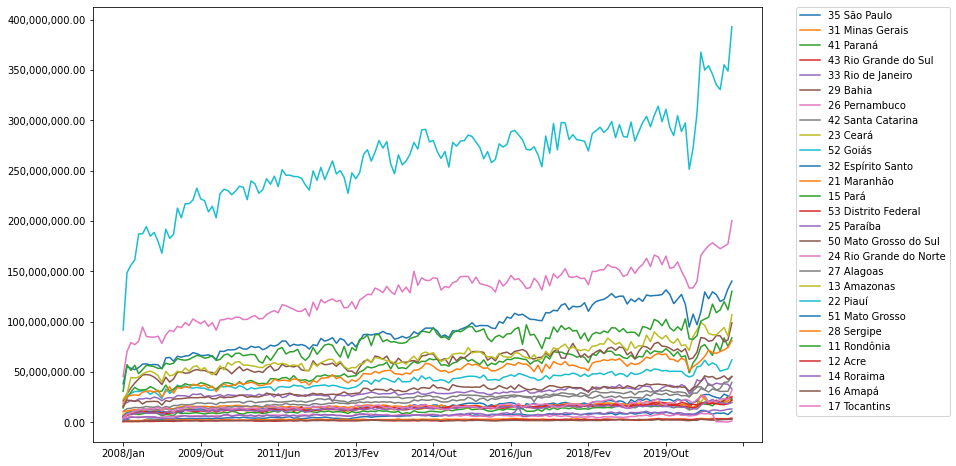

In [ ]:
ax2 = usaveis.T.plot(figsize=(12, 8))
#tive que aumentar o tamanho da figura para ficar do tamanho da legenda de mais fácil visualização
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#função que já aprendemos previamente no Notebook e já utilizamos
plt.legend(legenda_maior_menor, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#vi essa forma de ajustar o gráfico na documentação em Legend Guide do Matplotlib no link https://matplotlib.org/1.3.1/users/legend_guide.html e coloque o label como a lista que acabei de criar que ordena a legenda

### Desafio 02: Selecionar cinco estados para plotar apenas cinco estados

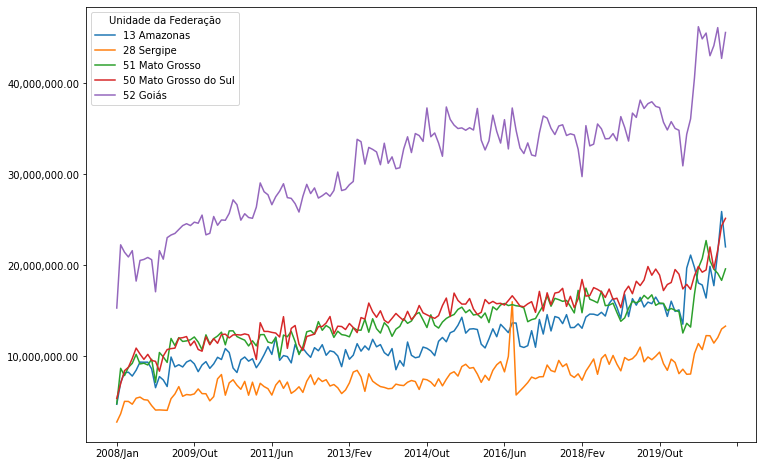

In [ ]:
ax3 = usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T.plot(figsize=(12, 8))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

Quando for criar expressões muito grandes é importante prestar atenção na ordem, porque se colocar na ordem errada vai dar problema (ex: se eu colocasse o ".T" antes do loc, ele ia procurar uma linha que possui "13 Amazonas" mas na verdade o "13 amazonas" já estava na coluna.

Outra questão que altera a ordem são os tipos dos dados também (olhar tabela abaixo) o plot é um método a ser aplicado para um dataframe, se você tentar aplicar para um index não vai dar certo

Caso no gráfico acima quiséssemos aplicar o método .sort_values() poderíamos seguir a ordem df.sort_values().plot() -> precisamos seguir essa ordem porque o .sort_values() é um método para ser aplicado em um DataFrame e retorna um outro Data Frame. O plot deve ser aplicado em um Data Frame mas retorna um gráfico. Dessa forma, não é possível aplicar o .sort_values() em um gráfico, por isso seguimos essa ordem anterior

In [ ]:
#type(usaveis)
# retorna: pandas.core.frame.DataFrame -> é um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]])
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T)
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.index)
# retorna: pandas.core.indexes.base.Index -> é uma series

#type(usaveis.plot)
# retorna: pandas.plotting._core.PlotAccessor